In [20]:
# https://www.datacamp.com/tutorial/k-means-clustering-python
import pandas as pd

# We will cluster the houses by location and observe how house prices fluctuate across California.
home_data = pd.read_csv('housing.csv', usecols = ['longitude', 'latitude', 'median_house_value'])
home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0
...,...,...,...
20635,-121.09,39.48,78100.0
20636,-121.21,39.49,77100.0
20637,-121.22,39.43,92300.0
20638,-121.32,39.43,84700.0


<Axes: xlabel='longitude', ylabel='latitude'>

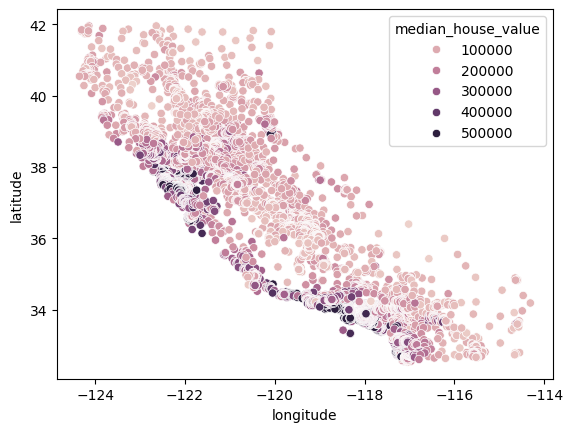

In [8]:
import seaborn as sns

# First we create a heatmap based on the median price in a block
# We see that most of the expensive houses are on the west coast
# most negative longitude value = west
sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue = 'median_house_value')

In [10]:
from sklearn.model_selection import train_test_split

# home_data[['latitude', 'longitude']] = features
# home_data[['median_house_value']] = target

X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']],
                                                    home_data[['median_house_value']],
                                                    test_size=0.33,
                                                    random_state=0
                                                   )

In [11]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np


def get_silhouette_score(X: np.ndarray, k: int):
    """
    This function returns the best number of clusters based on the silhouette score.
    The silhouette analysis can be used to study the separation distance between the resulting clusters.

    Parameters
    ----------
    X : np.ndarray
        The features matrix.
    k : int
        The maximum number of clusters to test.

    https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
    """
    scores = []

    # For each number of clusters, calculate the silhouette score
    for n_clusters in range(2, k):
        clusterer = KMeans(init="k-means++", n_clusters=n_clusters, random_state=42)
        y = clusterer.fit_predict(X)

        scores.append((n_clusters, silhouette_score(X, y)))

    # And we return the number of clusters with the highest silhouette score
    return max(scores, key=lambda x: x[1])[0]


In [24]:

score = get_silhouette_score(X_train, 4)

kmeans = KMeans(n_clusters = score, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=2, random_state=0)

<Axes: xlabel='longitude', ylabel='latitude'>

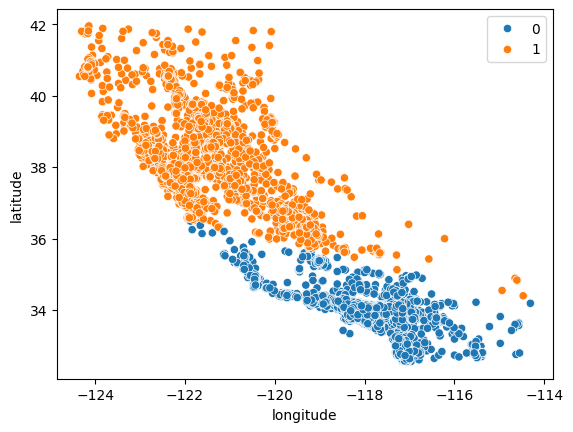

In [27]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)